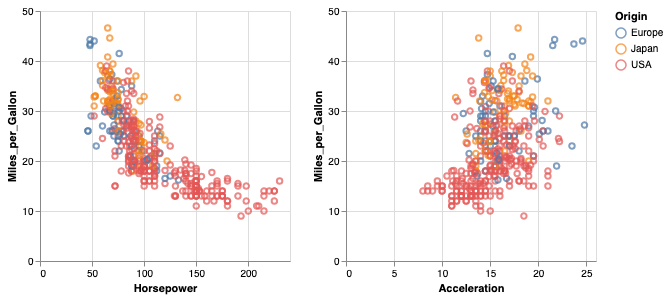

In [4]:
# https://altair-viz.github.io/gallery/scatter_linked_brush.html

import altair as alt
from vega_datasets import data

source = data.cars()

brush = alt.selection(type='interval', resolve='global')

base = alt.Chart(source).mark_point().encode(
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.ColorValue('gray')),
).add_selection(
    brush
).properties(
    width=250,
    height=250
)

chart = (base.encode(x='Horsepower') | base.encode(x='Acceleration'))
chart.display()

In [6]:
chart.save('output/interactive_scatterplot_brushing.html')

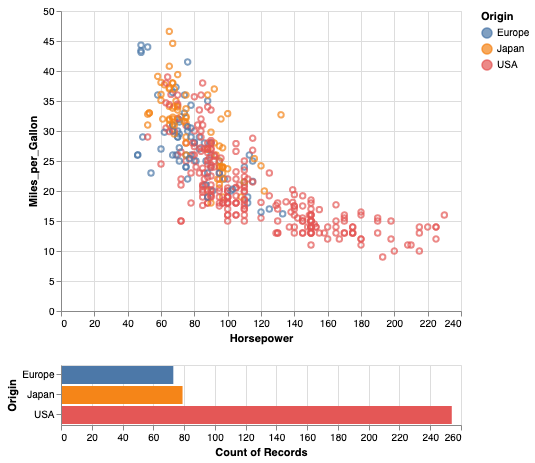

In [2]:
# https://altair-viz.github.io/gallery/selection_histogram.html

import altair as alt
from vega_datasets import data

source = data.cars()

brush = alt.selection(type='interval')

points = alt.Chart(source).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart(source).mark_bar().encode(
    y='Origin:N',
    color='Origin:N',
    x='count(Origin):Q'
).transform_filter(
    brush
)

chart = points & bars
chart.display()

In [7]:
chart.save('output/interactive_selection_histogram.html')